In [1]:
# Intro to Data Science Project:
# Pokemon Dataset
# Group 53: Yuchen Yao, Qixin Wang, Margaux Tian, Shuangning Yang, Chenyu Zhang

In [2]:
# import 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn import svm, datasets
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.metrics import roc_curve, auc,confusion_matrix, accuracy_score

import matplotlib.patches as patches
import matplotlib.patches as mpatches
import seaborn as sns
import matplotlib.ticker as mticker
import warnings
warnings.filterwarnings("ignore")

In [3]:
# load Pokemon file
pokemon_df = pd.read_csv("Pokemon.csv")
pokemon_df.drop('#', axis=1, inplace=True)
pokemon_df['id'] = range(1, len(pokemon_df)+1)

<AxesSubplot:xlabel='Generation'>

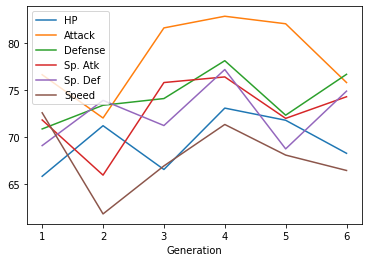

In [4]:
pokemon_stats_by_generation = pokemon_df.groupby('Generation').mean()[['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']]
pokemon_stats_by_generation.plot.line()

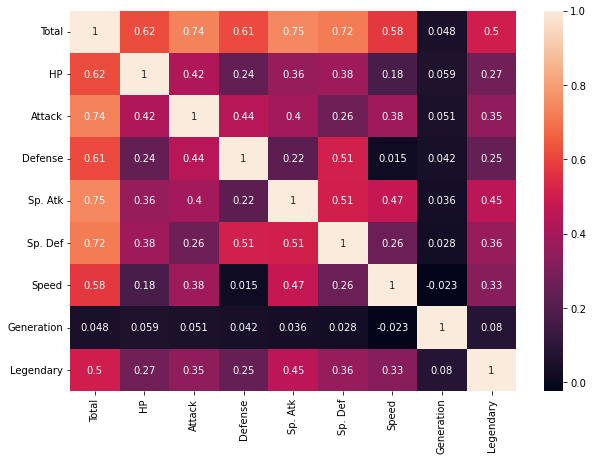

In [5]:
plt.figure(figsize=(10,7)) # manage the size of the plot
sns.heatmap(pokemon_df.drop('id', axis=1).corr(),annot=True) # prints correlation matrix
plt.show()

In [6]:
# According to above correlation matrix, "Generation" has less correlation with other attributes, then we decided to drop it
pokemon_df.pop("Generation")
display(pokemon_df)

# checking the missing value
for col in pokemon_df.columns:
    if pokemon_df[col].isnull().values.any() ==  True:
        print("The column",col,"has missing data" )
    else:
        print("All data are well cleaned in column",col )

# Analyze existing data, because some Pokémon do not have a second attribute, so the Type2 can be vacant data
# Fill in the Type2 to None if missing 
pokemon_df["Type 2"].fillna("None",inplace = True)
display(pokemon_df)

# Double check again to make sure no missing data
for col in pokemon_df.columns:
    if pokemon_df[col].isnull().values.any() ==  True:
        print("The column",col,"has missing data" )
    else:
        print("All data are well cleaned in column",col )

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary,id
0,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,False,1
1,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,False,2
2,Venusaur,Grass,Poison,525,80,82,83,100,100,80,False,3
3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,False,4
4,Charmander,Fire,NaN,309,39,52,43,60,50,65,False,5
...,...,...,...,...,...,...,...,...,...,...,...,...
795,Diancie,Rock,Fairy,600,50,100,150,100,150,50,True,796
796,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,True,797
797,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,True,798
798,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,True,799


All data are well cleaned in column Name
All data are well cleaned in column Type 1
The column Type 2 has missing data
All data are well cleaned in column Total
All data are well cleaned in column HP
All data are well cleaned in column Attack
All data are well cleaned in column Defense
All data are well cleaned in column Sp. Atk
All data are well cleaned in column Sp. Def
All data are well cleaned in column Speed
All data are well cleaned in column Legendary
All data are well cleaned in column id


,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary,id
0,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,False,1
1,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,False,2
2,Venusaur,Grass,Poison,525,80,82,83,100,100,80,False,3
3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,False,4
4,Charmander,Fire,None,309,39,52,43,60,50,65,False,5
...,...,...,...,...,...,...,...,...,...,...,...,...
795,Diancie,Rock,Fairy,600,50,100,150,100,150,50,True,796
796,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,True,797
797,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,True,798
798,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,True,799


All data are well cleaned in column Name
All data are well cleaned in column Type 1
All data are well cleaned in column Type 2
All data are well cleaned in column Total
All data are well cleaned in column HP
All data are well cleaned in column Attack
All data are well cleaned in column Defense
All data are well cleaned in column Sp. Atk
All data are well cleaned in column Sp. Def
All data are well cleaned in column Speed
All data are well cleaned in column Legendary
All data are well cleaned in column id


In [7]:
print('The column names of the dataset are: ', np.array(pokemon_df.columns)) # show the columns of the dataframe
print('The shape of the dataset is: ', pokemon_df.shape)    # show the shape of the dataframe

The column names of the dataset are:  ['Name' 'Type 1' 'Type 2' 'Total' 'HP' 'Attack' 'Defense' 'Sp. Atk'
 'Sp. Def' 'Speed' 'Legendary' 'id']
The shape of the dataset is:  (800, 12)


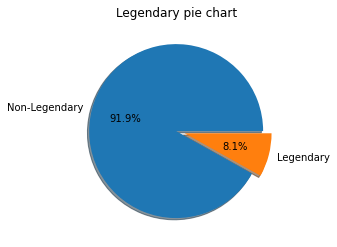

In [8]:
# display the Pie chart for the Legendary
X = pokemon_df['Legendary'].value_counts()
Labels = ["Non-Legendary", "Legendary"]
exp = [0,0.1]
fig = plt.figure()
plt.pie(X,labels = Labels, autopct = "%1.1f%%",explode = exp, shadow = True)
plt.title("Legendary pie chart")
plt.show()


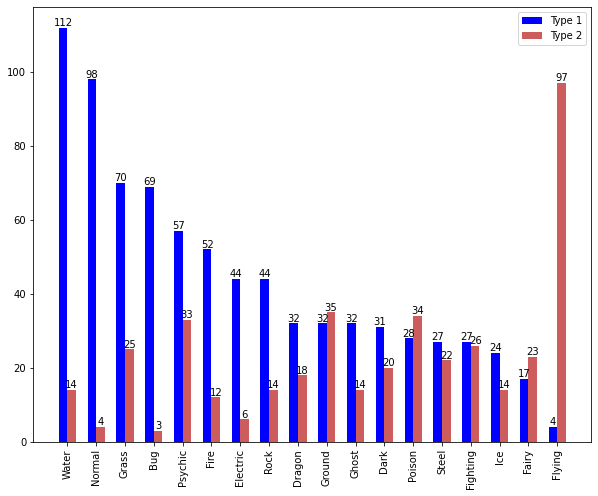

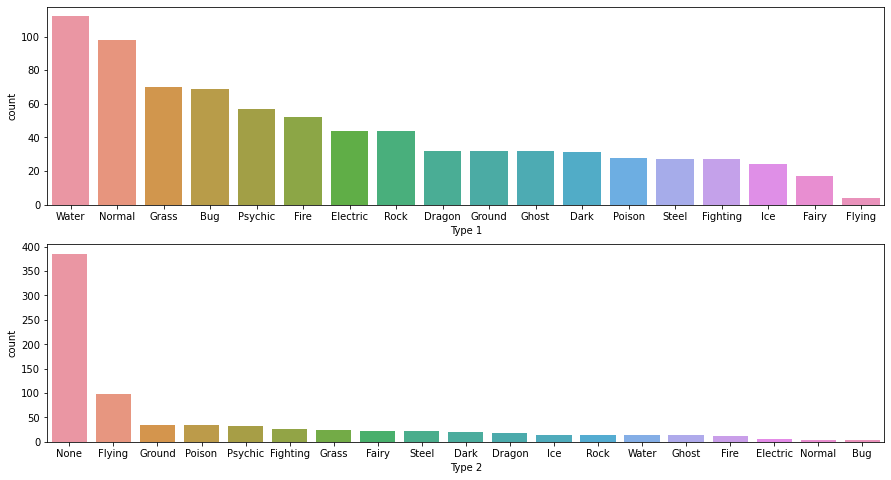

In [9]:
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)

# visulize the data 
pokemon_visual = pokemon_df.copy()
val1 = []
val2 = []

ind1 = pokemon_visual['Type 1'].value_counts().index
for i in ind1:
    val1.append(pokemon_visual['Type 1'].value_counts()[i])

for i in ind1:
    val2.append(pokemon_visual['Type 2'].value_counts()[i])
plt.figure(figsize = (10,8))    
plt.bar(x=np.arange(len(ind1)),height= val1,label='Type 1', color='blue',width=0.3) # Type 1 bar
plt.bar(x=np.arange(len(ind1)) + 0.3, height= val2, label='Type 2', width=0.3, color='indianred') # Type 2 bar

# Display specific values on the histogram
# ha controls the horizontal alignment
# va controls the vertical alignment
for x, y in enumerate(val1):
    plt.text(x, y, '%s' % y, ha='center', va='bottom')
for x, y in enumerate(val2):
    plt.text(x+ 0.3, y, '%s' % y, ha='center', va='bottom')
    
# plt.xaxis.set_major_locator(mticker.MaxNLocator(3))
# ticks_loc = plt.get_xticks().tolist()
# plt.xaxis.set_major_locator(mticker.FixedLocator(ticks_loc))
plt.gca().set_xticks(np.arange(len(ind1)) + 0.15)
plt.gca().set_xticklabels(pokemon_visual['Type 1'].value_counts().index)
plt.xticks(rotation=90)
plt.legend()
plt.show()


# seperate type1 and type2
f, ax = plt.subplots(2, 1, figsize=(15, 8))
sns.countplot('Type 1', data=pokemon_visual, ax=ax[0], order=pokemon_df['Type 1'].value_counts().index)
sns.countplot('Type 2', data=pokemon_visual, ax=ax[1], order=pokemon_df['Type 2'].value_counts().index)
plt.show()

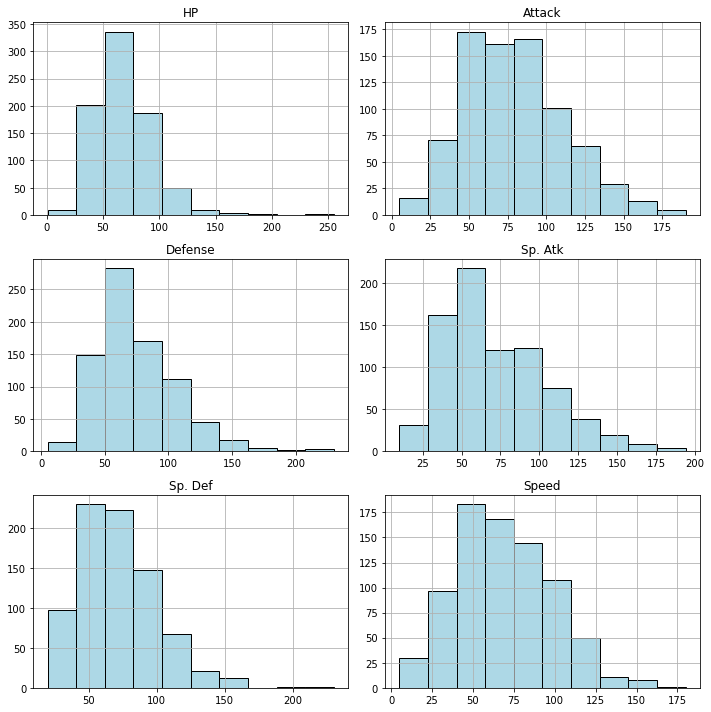

In [10]:
 # distribution for each feature (Type1)
fig = pokemon_df.iloc[:,[4,5,6,7,8,9,10]].hist(figsize=(10,10), xlabelsize=10, ylabelsize=10, grid=True, color ='lightblue', edgecolor='black')
                                                 
plt.tight_layout() 

Total describion
count    800.00000
mean     435.10250
std      119.96304
min      180.00000
25%      330.00000
50%      450.00000
75%      515.00000
max      780.00000
Name: Total, dtype: float64


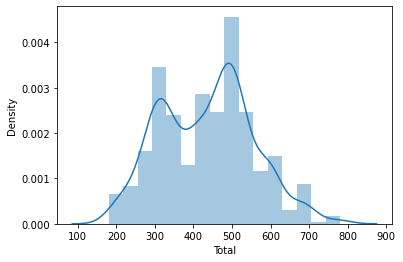

In [11]:
print("Total describion")
print(pokemon_visual['Total'].describe())
sns.distplot(pokemon_visual['Total'])
plt.show()

In [12]:
pokemon_stat = pokemon_df.copy()
pokemon_stat.pop('id')
pokemon_stat.pop('Total')
df_summary = pokemon_stat.describe() # detailed summary of the pokemon dataframe
df_summary

,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
count,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000
mean,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500
std,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474
min,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000
25%,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000
50%,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000
75%,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000
max,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000


In [13]:
Total_max = pokemon_df['Name'][pokemon_df['Total'].values.tolist().index(max(pokemon_df['Total'].values.tolist()))]
HP_max = pokemon_df['Name'][pokemon_df['HP'].values.tolist().index(max(pokemon_df['HP'].values.tolist()))]
Attack_max = pokemon_df['Name'][pokemon_df['Attack'].values.tolist().index(max(pokemon_df['Attack'].values.tolist()))]
Defense_max = pokemon_df['Name'][pokemon_df['Defense'].values.tolist().index(max(pokemon_df['Defense'].values.tolist()))]
SPAttack_max = pokemon_df['Name'][pokemon_df['Sp. Atk'].values.tolist().index(max(pokemon_df['Sp. Atk'].values.tolist()))]
SPDefense_max = pokemon_df['Name'][pokemon_df['Sp. Def'].values.tolist().index(max(pokemon_df['Sp. Def'].values.tolist()))]
Speed_max = pokemon_df['Name'][pokemon_df['Speed'].values.tolist().index(max(pokemon_df['Speed'].values.tolist()))]

print("Max Total and Name:            ", max(pokemon_df['Total']), "    ", Total_max)  # returns the pokemon with highest Total
print("Max HP and Name:               ", max(pokemon_df['HP']), "    ", HP_max)  # returns the pokemon with highest HP
print("Max Attack and Name:           ", max(pokemon_df['Attack']), "    ", Attack_max)  # returns the pokemon with highest Attack
print("Max Defense and Name:          ", max(pokemon_df['Defense']),  "    ", Defense_max)  # returns the pokemon with highest Defense
print("Max Special Attack and Name:   ", max(pokemon_df['Sp. Atk']),  "    ", SPAttack_max)  # returns the pokemon with highest SP. Attack
print("Max Special Defense and Name:  ", max(pokemon_df['Sp. Def']),  "    ", SPDefense_max)  # returns the pokemon with highest Sp. Defense
print("Max Speed and Name:            ", max(pokemon_df['Speed']),  "    ", Speed_max)  # returns the pokemon with highest Speed

Max Total and Name:             780      MewtwoMega Mewtwo X
Max HP and Name:                255      Blissey
Max Attack and Name:            190      MewtwoMega Mewtwo X
Max Defense and Name:           230      SteelixMega Steelix
Max Special Attack and Name:    194      MewtwoMega Mewtwo Y
Max Special Defense and Name:   230      Shuckle
Max Speed and Name:             180      DeoxysSpeed Forme


In [14]:
pokemon_df2 = pokemon_df.copy()
pokemon_df2 = pokemon_df2[pokemon_df2["Type 2"] != "None"]
pokemon_df2.drop("Type 1", axis=1, inplace=True)
pokemon_df2

,Name,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary,id
0,Bulbasaur,Poison,318,45,49,49,65,65,45,False,1
1,Ivysaur,Poison,405,60,62,63,80,80,60,False,2
2,Venusaur,Poison,525,80,82,83,100,100,80,False,3
3,VenusaurMega Venusaur,Poison,625,80,100,123,122,120,80,False,4
6,Charizard,Flying,534,78,84,78,109,85,100,False,7
...,...,...,...,...,...,...,...,...,...,...,...
795,Diancie,Fairy,600,50,100,150,100,150,50,True,796
796,DiancieMega Diancie,Fairy,700,50,160,110,160,110,110,True,797
797,HoopaHoopa Confined,Ghost,600,80,110,60,150,130,70,True,798
798,HoopaHoopa Unbound,Dark,680,80,160,60,170,130,80,True,799


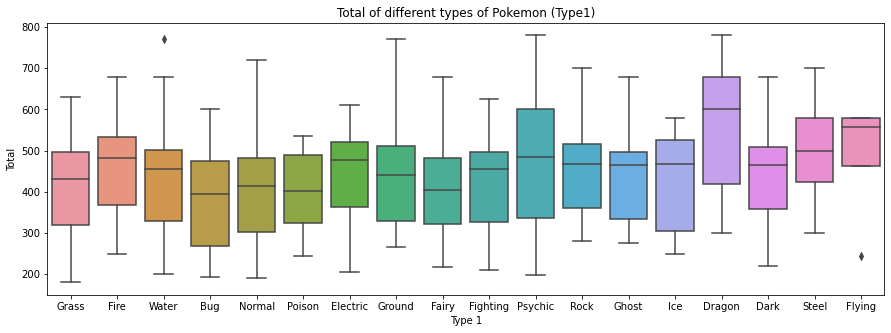

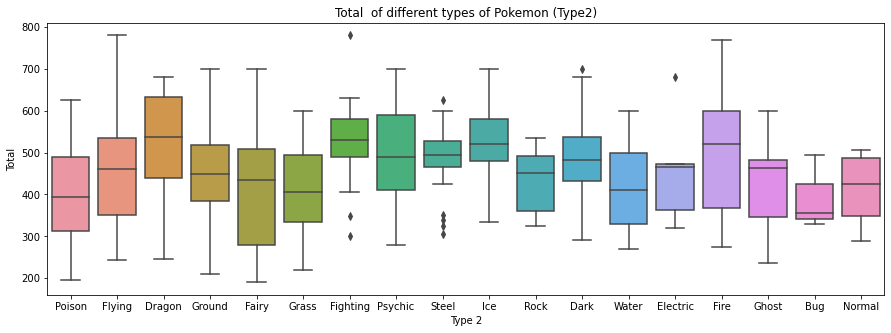

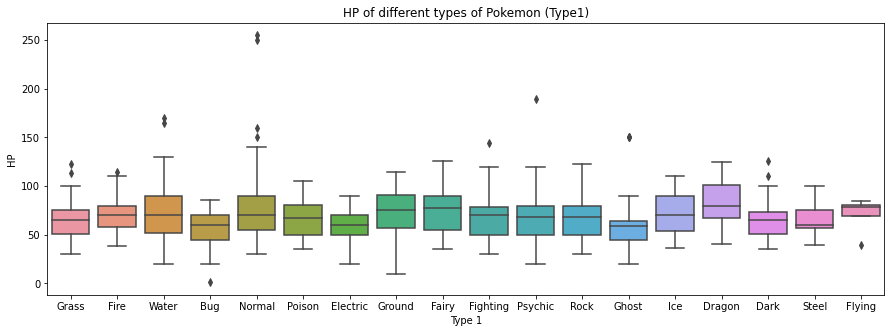

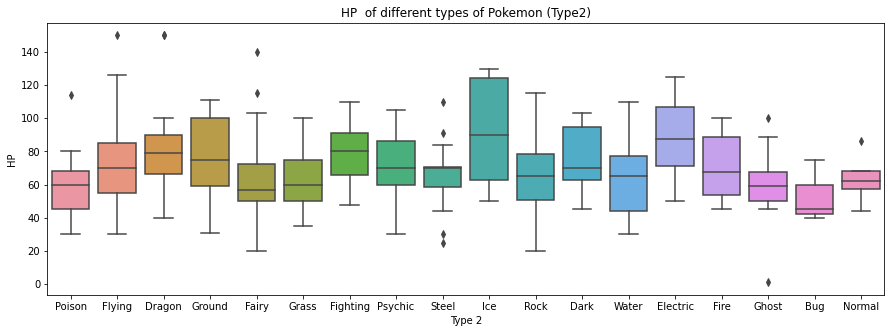

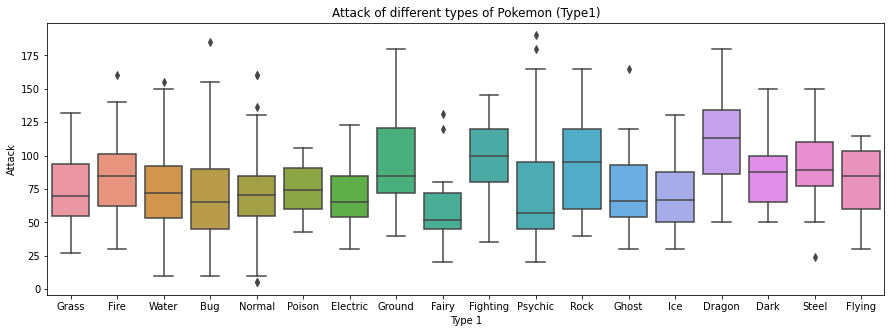

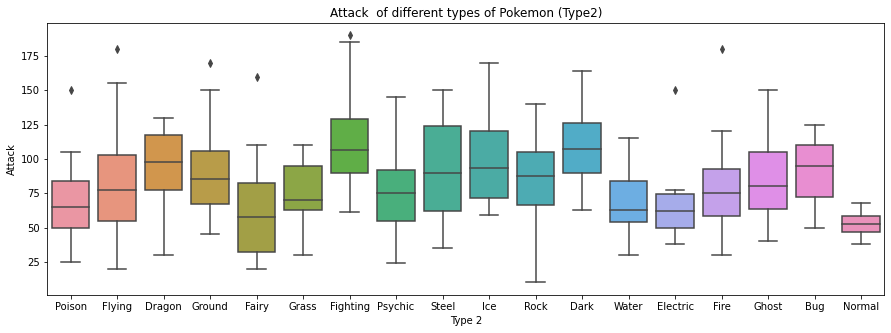

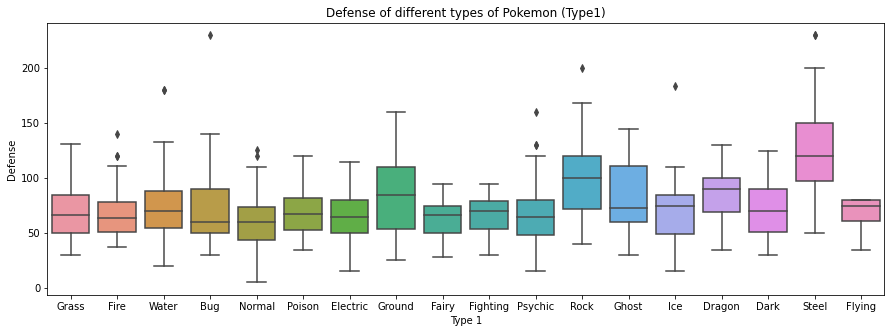

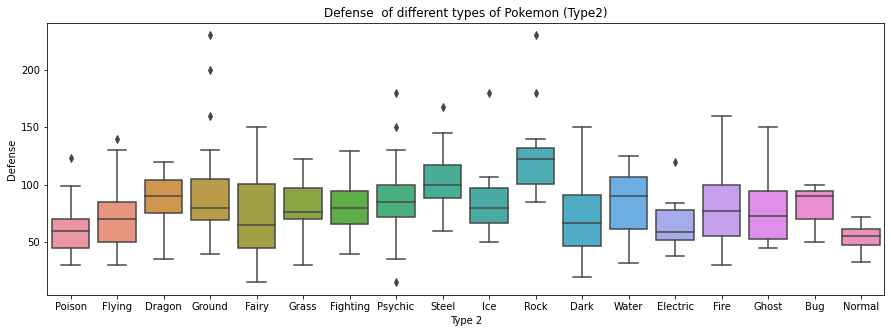

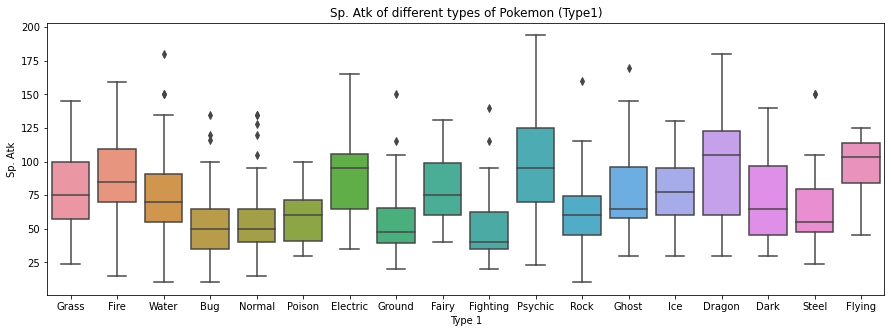

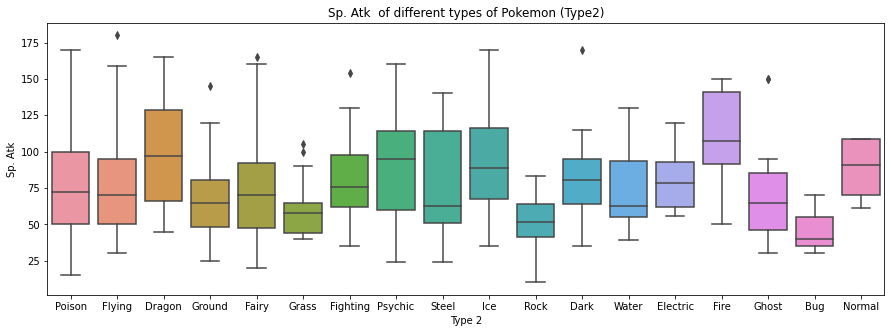

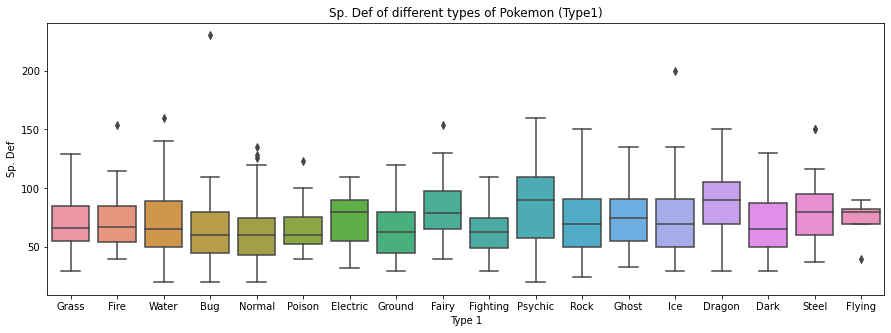

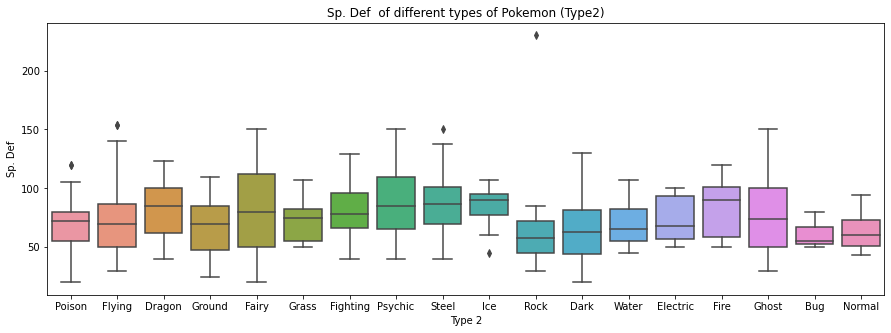

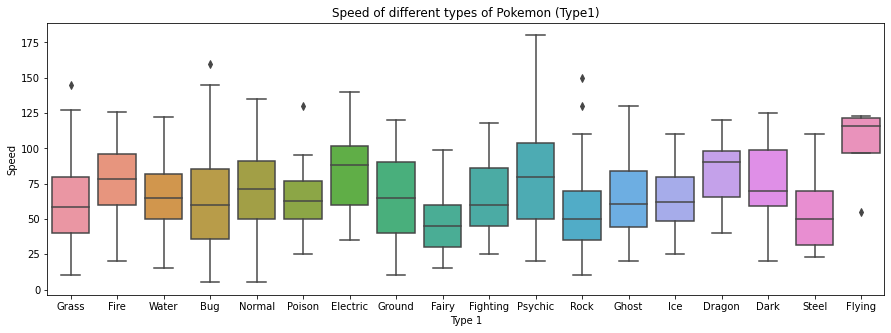

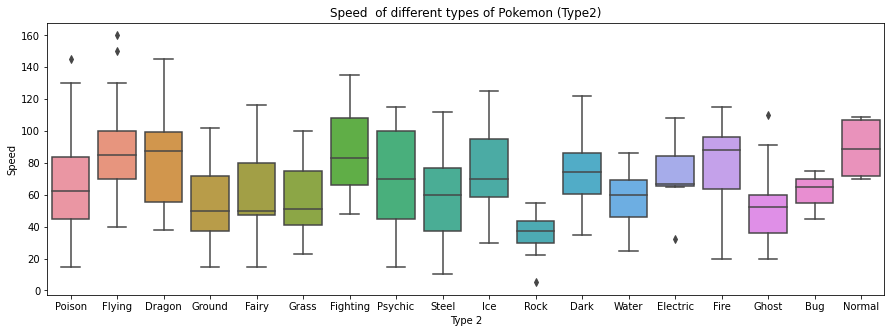

In [15]:
feature = [ 'Total','HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']
type_list = [1,2]
for i in range(len(feature)):
    for j in range(len(type_list)):
        if j % 2 == 0:
            plt.subplots(figsize = (15,5))
            plt.title(str(feature[i]) + ' of different types of Pokemon (Type1)')
            sns.boxplot(x = "Type 1", y = str(feature[i]), data=pokemon_df)
            plt.show()
        else:
            plt.subplots(figsize = (15,5))
            plt.title(str(feature[i]) + '  of different types of Pokemon (Type2)')
            sns.boxplot(x = "Type 2", y = str(feature[i]), data=pokemon_df2)
            plt.show()
    

In [16]:
# Analysis
print(pokemon_df)
# Combine another csv file to include the combat information
combats_df = pd.read_csv("combats.csv")
fights_df = pd.merge(combats_df, pokemon_df, how='left',
                    left_on='First_pokemon', right_on='id').drop('id', axis=1)
fights_df = pd.merge(fights_df, pokemon_df, how='left',
                    left_on='Second_pokemon', right_on='id', suffixes=('_first','_second')).drop('id', axis=1)
fights_df['first_win'] = fights_df['Winner'] == fights_df['First_pokemon']
print(fights_df)

                      Name   Type 1  Type 2  Total  HP  Attack  Defense  \
0                Bulbasaur    Grass  Poison    318  45      49       49   
1                  Ivysaur    Grass  Poison    405  60      62       63   
2                 Venusaur    Grass  Poison    525  80      82       83   
3    VenusaurMega Venusaur    Grass  Poison    625  80     100      123   
4               Charmander     Fire    None    309  39      52       43   
..                     ...      ...     ...    ...  ..     ...      ...   
795                Diancie     Rock   Fairy    600  50     100      150   
796    DiancieMega Diancie     Rock   Fairy    700  50     160      110   
797    HoopaHoopa Confined  Psychic   Ghost    600  80     110       60   
798     HoopaHoopa Unbound  Psychic    Dark    680  80     160       60   
799              Volcanion     Fire   Water    600  80     110      120   

     Sp. Atk  Sp. Def  Speed  Legendary   id  
0         65       65     45      False    1  
1    

In [17]:
# Build machine learning pipeline with PyCaret to simply try most models

In [18]:
X = fights_df.drop(['First_pokemon','Second_pokemon','Winner','Name_first','Total_first','Name_second','Total_second', 'Type 1_first','Type 2_first','Type 1_second','Type 2_second','Legendary_first','Legendary_second'], axis=1)
Y = fights_df['first_win']
# Create the dataframe for training
X

,HP_first,Attack_first,Defense_first,Sp. Atk_first,Sp. Def_first,Speed_first,HP_second,Attack_second,Defense_second,Sp. Atk_second,Sp. Def_second,Speed_second,first_win
0,50,64,50,45,50,41,70,70,40,60,40,60,False
1,91,90,72,90,129,108,91,129,90,72,90,108,False
2,55,40,85,80,105,40,75,75,75,125,95,40,False
3,40,40,40,70,40,20,77,120,90,60,90,48,False
4,70,60,125,115,70,55,20,10,230,10,230,5,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,100,120,100,150,120,90,30,40,70,70,25,60,True
49996,60,85,40,30,45,68,35,55,40,45,40,60,True
49997,60,50,100,85,70,65,73,115,60,60,60,90,False
49998,40,30,50,55,55,100,25,35,70,95,55,45,True


In [21]:
from pycaret.datasets import get_data
from pycaret.classification import *
clf1 = setup(data = X, target = 'first_win')

,Description,Value
0,session_id,611
1,Target,first_win
2,Target Type,Binary
3,Label Encoded,"False: 0, True: 1"
4,Original Data,"(50000, 13)"
5,Missing Values,False
6,Numeric Features,12
7,Categorical Features,0
8,Ordinal Features,False
9,High Cardinality Features,False


In [20]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.9466,0.9787,0.9561,0.9324,0.9441,0.8930,0.8933,0.4450
rf,Random Forest Classifier,0.9453,0.9788,0.9502,0.9348,0.9424,0.8904,0.8905,2.0740
et,Extra Trees Classifier,0.9360,0.9740,0.9368,0.9282,0.9324,0.8716,0.8717,1.4210
gbc,Gradient Boosting Classifier,0.9213,0.9598,0.9200,0.9137,0.9168,0.8422,0.8423,2.0770
dt,Decision Tree Classifier,0.9203,0.9200,0.9138,0.9167,0.9152,0.8399,0.8400,0.1220
lr,Logistic Regression,0.8893,0.9273,0.8774,0.8867,0.8820,0.7778,0.7779,1.0650
ridge,Ridge Classifier,0.8883,0.0000,0.8764,0.8855,0.8809,0.7758,0.7759,0.0670
lda,Linear Discriminant Analysis,0.8883,0.9270,0.8765,0.8855,0.8809,0.7758,0.7759,0.0570
knn,K Neighbors Classifier,0.8720,0.9334,0.8686,0.8610,0.8648,0.7433,0.7433,1.4610
qda,Quadratic Discriminant Analysis,0.8575,0.9053,0.8494,0.8485,0.8489,0.7142,0.7142,0.0360


LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=1631, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [22]:
# Here we build each model in detail

In [23]:
X = fights_df.drop(['First_pokemon','Second_pokemon','Winner','Name_first','Total_first','Name_second','Total_second', 'first_win', 'Type 1_first','Type 2_first','Type 1_second','Type 2_second','Legendary_first','Legendary_second'], axis=1)
Y = fights_df['first_win']

TPR:  0.860903060132677
FPR:  0.11732682560540642
TPR-FPR:  0.7435762345272706
accuracy_score: 0.8725


<AxesSubplot:>

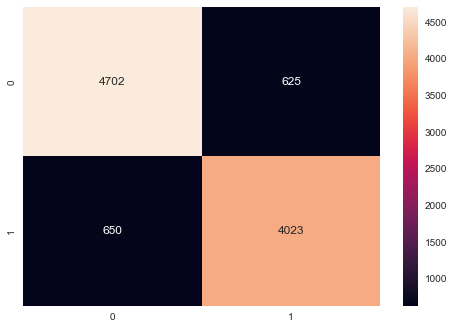

In [24]:
# knn
X_train, X_test, y_train, y_test = train_test_split(X, Y, train_size=0.8, random_state=636)
knn = KNeighborsClassifier(n_neighbors=3) # tune parameters
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
TN = cm[0,0]
FP = cm[0,1]
FN = cm[1,0]
TP = cm[1,1]
TPR=TP/(TP+FN)
FPR=FP/(FP+TN)
print("TPR: ", TPR)
print("FPR: ", FPR)
print("TPR-FPR: ", TPR-FPR)
# print(confusion_matrix(y_test, y_pred))
print("accuracy_score:",accuracy_score(y_test,y_pred))
confusion_m = pd.DataFrame(data=cm)
sns.heatmap(confusion_m , annot=True,fmt='d')

TPR:  0.7845067408517012
FPR:  0.18884925849446219
TPR-FPR:  0.595657482357239
accuracy_score: 0.7987


<AxesSubplot:>

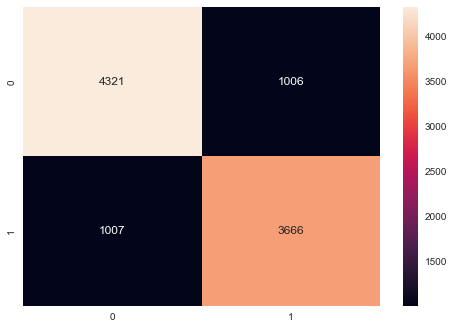

In [25]:
# GaussianNB
gaussian = GaussianNB()
gaussian.fit(X_train, y_train)
y_pred = gaussian.predict(X_test)
# print(confusion_matrix(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
TN = cm[0,0]
FP = cm[0,1]
FN = cm[1,0]
TP = cm[1,1]
TPR=TP/(TP+FN)
FPR=FP/(FP+TN)
print("TPR: ", TPR)
print("FPR: ", FPR)
print("TPR-FPR: ", TPR-FPR)
# print(confusion_matrix(y_test, y_pred))
print("accuracy_score:",accuracy_score(y_test,y_pred))
confusion_m = pd.DataFrame(data=cm)
sns.heatmap(confusion_m , annot=True,fmt='d')

TPR:  0.8728867964904772
FPR:  0.09329829172141918
TPR-FPR:  0.779588504769058
accuracy_score: 0.8909


<AxesSubplot:>

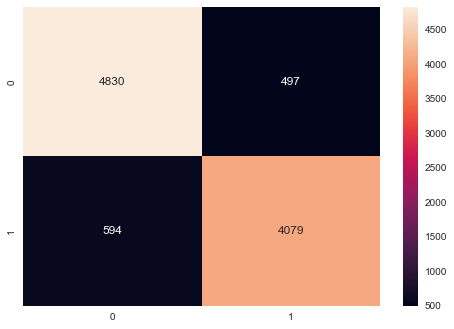

In [26]:
# LDA
LDA_model = LinearDiscriminantAnalysis()
LDA_model.fit(X_train, y_train)
y_pred = LDA_model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
TN = cm[0,0]
FP = cm[0,1]
FN = cm[1,0]
TP = cm[1,1]
TPR=TP/(TP+FN)
FPR=FP/(FP+TN)
print("TPR: ", TPR)
print("FPR: ", FPR)
print("TPR-FPR: ", TPR-FPR)
# print(confusion_matrix(y_test, y_pred))
print("accuracy_score:",accuracy_score(y_test,y_pred))
confusion_m = pd.DataFrame(data=cm)
sns.heatmap(confusion_m , annot=True,fmt='d')

TPR:  0.8416434838433554
FPR:  0.12671297165383894
TPR-FPR:  0.7149305121895164
accuracy_score: 0.8585


<AxesSubplot:>

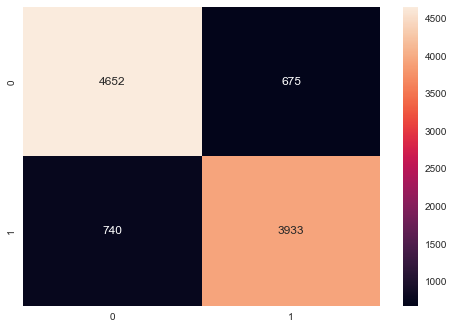

In [27]:
# QDA
QDA_model = QuadraticDiscriminantAnalysis()
QDA_model.fit(X_train, y_train)
y_pred = QDA_model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
TN = cm[0,0]
FP = cm[0,1]
FN = cm[1,0]
TP = cm[1,1]
TPR=TP/(TP+FN)
FPR=FP/(FP+TN)
print("TPR: ", TPR)
print("FPR: ", FPR)
print("TPR-FPR: ", TPR-FPR)
# print(confusion_matrix(y_test, y_pred))
print("accuracy_score:",accuracy_score(y_test,y_pred))
confusion_m = pd.DataFrame(data=cm)
sns.heatmap(confusion_m , annot=True,fmt='d')

TPR:  0.8752407447036166
FPR:  0.09273512295851323
TPR-FPR:  0.7825056217451033
accuracy_score: 0.8923


<AxesSubplot:>

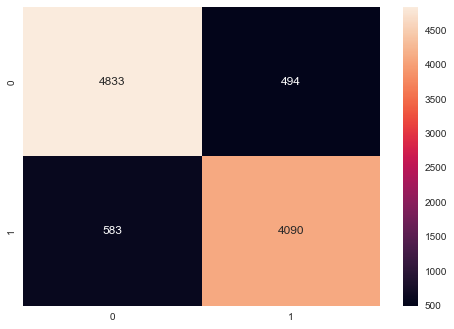

In [30]:
# Logistic regression
lg = LogisticRegression()
lg.fit(X_train, y_train)
y_pred = lg.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
TN = cm[0,0]
FP = cm[0,1]
FN = cm[1,0]
TP = cm[1,1]
TPR=TP/(TP+FN)
FPR=FP/(FP+TN)
print("TPR: ", TPR)
print("FPR: ", FPR)
print("TPR-FPR: ", TPR-FPR)
# print(confusion_matrix(y_test, y_pred))
print("accuracy_score:",accuracy_score(y_test,y_pred))
confusion_m = pd.DataFrame(data=cm)
sns.heatmap(confusion_m , annot=True,fmt='d')

In [31]:
# Random forest
train_score = 0
test_score = 0
max_depth = 0
max_features = 0

for i in range (1,50):
    for j in range(1,12):
        clf = RandomForestClassifier(n_estimators=100, max_depth=i, max_features=j,random_state = 42).fit(X_train, y_train)
        if clf.score(X_test,y_test)>test_score:
            train_score = clf.score(X_train,y_train)
            test_score = clf.score(X_test,y_test)
            max_depth = i
            max_features = j
                    
print("The best train accuracy:",train_score)
print("The corresponding best test accuracy:",test_score)

print("max_depth=", max_depth,  "max_features=", max_features)

The best train accuracy: 0.999925
The corresponding best test accuracy: 0.9543
max_depth= 32 max_features= 7


TPR:  0.9561309651187674
FPR:  0.04730617608409987
TPR-FPR:  0.9088247890346675
accuracy_score: 0.9543


<AxesSubplot:>

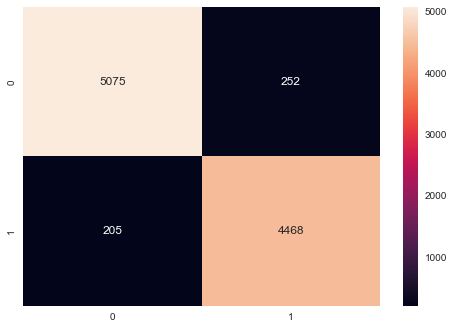

In [33]:
rf = RandomForestClassifier(n_estimators=100,max_depth=32, max_features=7,random_state = 42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
TN = cm[0,0]
FP = cm[0,1]
FN = cm[1,0]
TP = cm[1,1]
TPR=TP/(TP+FN)
FPR=FP/(FP+TN)
print("TPR: ", TPR)
print("FPR: ", FPR)
print("TPR-FPR: ", TPR-FPR)
# print(confusion_matrix(y_test, y_pred))
print("accuracy_score:",accuracy_score(y_test,y_pred))
confusion_m = pd.DataFrame(data=cm)
sns.heatmap(confusion_m , annot=True,fmt='d')

Optimal C 0.1
accuracy_score: 0.9543


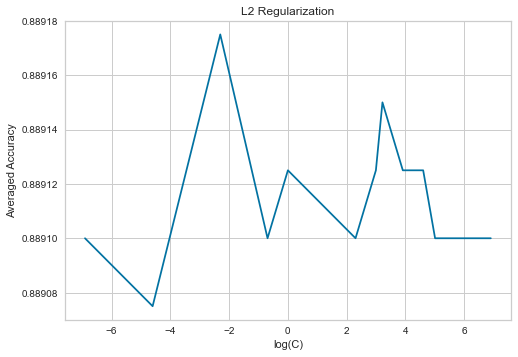

In [34]:
# LogisticRegression tuning
C = [1e-3, 1e-2, 1e-1, 0.5,1e0,1e1,20,25,50, 1e2,150, 1e3]
cv_scores = [0]*12 # List for storing the averaged accuracies.

x = 0
for i in C:
    lcr =  LogisticRegression(penalty= 'l2', C=i) # Inverse of regularization strength.
    lcr.fit(X_train, y_train)
    cv_scores[x] = np.mean(cross_val_score(lcr,X_train, y_train,cv = 10, scoring="accuracy" ))
    x = x + 1

# Print the "Optimal C"
# YOUR CODE HERE:
optc = C[cv_scores.index(max(cv_scores))]
print("Optimal C",optc)
print("accuracy_score:",accuracy_score(y_test,y_pred))

plt.plot(np.log(C), cv_scores)
plt.xlabel("log(C)")
plt.ylabel("Averaged Accuracy")
plt.title("L2 Regularization")
plt.show()

TPR:  0.9144018831585705
FPR:  0.0728364933358363
TPR-FPR:  0.8415653898227342
accuracy_score: 0.9212


<AxesSubplot:>

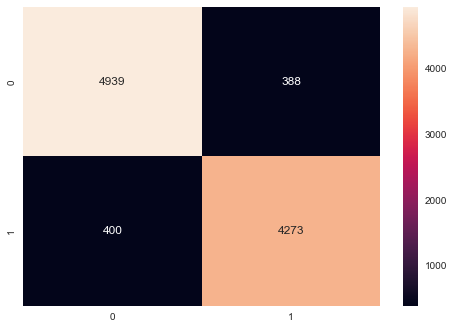

In [35]:
svmclf = svm.SVC(kernel='rbf')
svmclf.fit(X_train, y_train)
y_pred = svmclf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
TN = cm[0,0]
FP = cm[0,1]
FN = cm[1,0]
TP = cm[1,1]
TPR=TP/(TP+FN)
FPR=FP/(FP+TN)
print("TPR: ", TPR)
print("FPR: ", FPR)
print("TPR-FPR: ", TPR-FPR)
# print(confusion_matrix(y_test, y_pred))
print("accuracy_score:",accuracy_score(y_test,y_pred))
confusion_m = pd.DataFrame(data=cm)
sns.heatmap(confusion_m , annot=True,fmt='d')

In [36]:
knnscore = accuracy_score(knn.predict(X_test),y_test)
gauscore = accuracy_score(gaussian.predict(X_test),y_test)
ldascore = accuracy_score(LDA_model.predict(X_test),y_test)
qdascore = accuracy_score(QDA_model.predict(X_test),y_test)
lrscore = accuracy_score(lg.predict(X_test),y_test)
rfcscore = accuracy_score(rf.predict(X_test),y_test)
svmscore = accuracy_score(svmclf.predict(X_test),y_test)
sco = {"KNN":knnscore, "Gaussian":gauscore, "LDA":ldascore, "QDA":qdascore,
          "LogisticRegression":lrscore, "RandomForestClassifer":rfcscore, "SVM": svmscore}
ans = sorted(sco.items(), key=lambda item:item[1], reverse=True)
ans

[('RandomForestClassifer', 0.9543),
 ('SVM', 0.9212),
 ('LogisticRegression', 0.8923),
 ('LDA', 0.8909),
 ('KNN', 0.8725),
 ('QDA', 0.8585),
 ('Gaussian', 0.7987)]

In [37]:
# consider the highest acc model's feature_importance (Random Forest)
importance = pd.DataFrame({'feature':X_train.columns, 'importance':rf.feature_importances_})
importance.sort_values(by='importance', ascending = False)

,feature,importance
5,Speed_first,0.391520
11,Speed_second,0.379453
1,Attack_first,0.036705
7,Attack_second,0.035420
3,Sp. Atk_first,0.023652
9,Sp. Atk_second,0.023188
0,HP_first,0.021091
6,HP_second,0.019562
8,Defense_second,0.018269
2,Defense_first,0.017863


<AxesSubplot:ylabel='feature'>

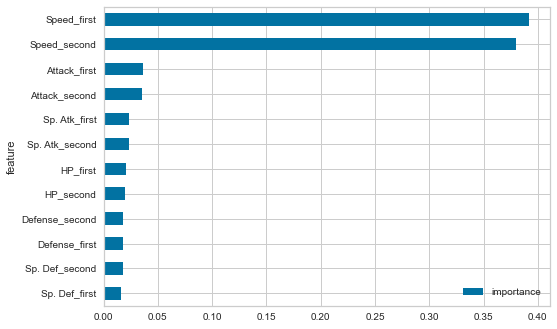

In [38]:
# Sort the importance
importance.sort_values(by='importance', inplace=True)
importance.iloc[:,:].plot(kind='barh',x='feature',y='importance')

In [39]:
for i in range(12):
    print(i, importance.iloc[i], "\n")

0 feature       Sp. Def_first
importance         0.015665
Name: 4, dtype: object 

1 feature       Sp. Def_second
importance          0.017612
Name: 10, dtype: object 

2 feature       Defense_first
importance         0.017863
Name: 2, dtype: object 

3 feature       Defense_second
importance          0.018269
Name: 8, dtype: object 

4 feature       HP_second
importance     0.019562
Name: 6, dtype: object 

5 feature       HP_first
importance    0.021091
Name: 0, dtype: object 

6 feature       Sp. Atk_second
importance          0.023188
Name: 9, dtype: object 

7 feature       Sp. Atk_first
importance         0.023652
Name: 3, dtype: object 

8 feature       Attack_second
importance          0.03542
Name: 7, dtype: object 

9 feature       Attack_first
importance        0.036705
Name: 1, dtype: object 

10 feature       Speed_second
importance        0.379453
Name: 11, dtype: object 

11 feature       Speed_first
importance        0.39152
Name: 5, dtype: object 



In [40]:
# Method 1: Based on single attribute

In [41]:
max_speed = pokemon_df["Speed"].max()
max_speed_info = pokemon_df[pokemon_df['Speed']==max_speed]
print(max_speed)
print(max_speed_info)

180
                  Name   Type 1 Type 2  Total  HP  Attack  Defense  Sp. Atk  \
431  DeoxysSpeed Forme  Psychic   None    600  50      95       90       95   

     Sp. Def  Speed  Legendary   id  
431       90    180       True  432  


In [42]:
max_att = pokemon_df["Attack"].max()
max_att_info = pokemon_df[pokemon_df['Attack']==max_att]
print(max_att)
print(max_att_info)

190
                    Name   Type 1    Type 2  Total   HP  Attack  Defense  \
163  MewtwoMega Mewtwo X  Psychic  Fighting    780  106     190      100   

     Sp. Atk  Sp. Def  Speed  Legendary   id  
163      154      100    130       True  164  


In [43]:
max_sp_att = pokemon_df["Sp. Atk"].max()
max_sp_att_info = pokemon_df[pokemon_df['Sp. Atk']==max_sp_att]
print(max_sp_att)
print(max_sp_att_info)

194
                    Name   Type 1 Type 2  Total   HP  Attack  Defense  \
164  MewtwoMega Mewtwo Y  Psychic   None    780  106     150       70   

     Sp. Atk  Sp. Def  Speed  Legendary   id  
164      194      120    140       True  165  


In [44]:
comb = [max_speed_info,max_att_info,max_sp_att_info]
result = pd.concat(comb)
result

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary,id
431,DeoxysSpeed Forme,Psychic,None,600,50,95,90,95,90,180,True,432
163,MewtwoMega Mewtwo X,Psychic,Fighting,780,106,190,100,154,100,130,True,164
164,MewtwoMega Mewtwo Y,Psychic,None,780,106,150,70,194,120,140,True,165


In [45]:
# Method 2: Using the weights generated from the importance

In [46]:
# Create the weight matrix
weight_speed = (importance.iloc[10][1]+importance.iloc[11][1])/2
weight_attack = (importance.iloc[8][1]+importance.iloc[9][1])/2
weight_Sp_att = (importance.iloc[6][1]+importance.iloc[7][1])/2
weight_HP = (importance.iloc[3][1]+importance.iloc[5][1])/2
weight_Sp_def = (importance.iloc[1][1]+importance.iloc[4][1])/2
weight_defense = (importance.iloc[0][1]+importance.iloc[2][1])/2
weight=[weight_HP, weight_attack, weight_defense, weight_Sp_att, weight_Sp_def, weight_speed]
weight

[0.019680144067261263,
 0.036062583489036536,
 0.016763824973047566,
 0.023420021972984463,
 0.018586924431568085,
 0.38548650106610205]

In [47]:
result = pokemon_df.copy()

In [48]:
result['HP']=result['HP'] * weight[0]
result['Attack']=result['Attack'] * weight[1]
result['Defense']=result['Defense'] * weight[2]
result['Sp. Atk']=result['Sp. Atk'] * weight[3]
result['Sp. Def']=result['Sp. Def'] * weight[4]
result['Speed']=result['Speed'] * weight[5]
result['Weighted Ability'] = result['HP']+result['Attack']+result['Defense']+result['Sp. Atk']+result['Sp. Def']+result['Speed']
result.sort_values(by='Weighted Ability', inplace=True, ascending=False)
result

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary,id,Weighted Ability
431,DeoxysSpeed Forme,Psychic,None,600,0.984007,3.425945,1.508744,2.224902,1.672823,69.387570,True,432,79.203992
429,DeoxysAttack Forme,Psychic,None,600,0.984007,6.491265,0.335276,4.215604,0.371738,57.822975,True,430,70.220866
428,DeoxysNormal Forme,Psychic,None,600,0.984007,5.409388,0.838191,3.513003,0.929346,57.822975,True,429,69.496911
164,MewtwoMega Mewtwo Y,Psychic,None,780,2.086095,5.409388,1.173468,4.543484,2.230431,53.968110,True,165,69.410976
154,AerodactylMega Aerodactyl,Rock,Flying,615,1.574412,4.868449,1.424925,1.639402,1.765758,57.822975,False,155,69.095920
...,...,...,...,...,...,...,...,...,...,...,...,...,...
187,Cleffa,Fairy,None,218,0.984007,0.901565,0.469387,1.053901,1.022281,5.782298,False,188,10.213438
658,Ferroseed,Grass,Steel,305,0.865926,1.803129,1.525508,0.562081,1.598476,3.854865,False,659,10.209985
188,Igglybuff,Normal,Fairy,210,1.771213,1.081878,0.251457,0.936801,0.371738,5.782298,False,189,10.195385
291,Cascoon,Bug,None,205,0.984007,1.262190,0.922010,0.585501,0.464673,5.782298,False,292,10.000679


In [49]:
# The best three pokemon
result.head(3)

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary,id,Weighted Ability
431,DeoxysSpeed Forme,Psychic,None,600,0.984007,3.425945,1.508744,2.224902,1.672823,69.387570,True,432,79.203992
429,DeoxysAttack Forme,Psychic,None,600,0.984007,6.491265,0.335276,4.215604,0.371738,57.822975,True,430,70.220866
428,DeoxysNormal Forme,Psychic,None,600,0.984007,5.409388,0.838191,3.513003,0.929346,57.822975,True,429,69.496911


In [50]:
# Radar charts of the best three pokemon

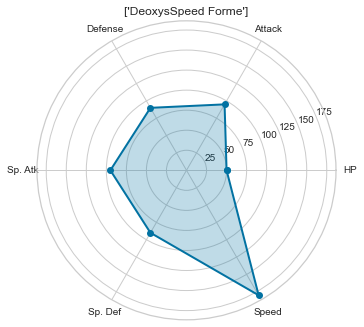

In [51]:
labels=np.array(['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed'])
stats=pokemon_df.loc[431,labels].values
angles=np.linspace(0, 2*np.pi, len(labels), endpoint=False)
# close the plot
stats=np.concatenate((stats,[stats[0]]))
angles=np.concatenate((angles,[angles[0]]))

fig=plt.show()
ax = plt.subplot(111, polar=True)
ax.plot(angles, stats, 'o-', linewidth=2)
ax.fill(angles, stats, alpha=0.25)
ax.set_thetagrids((angles * 180/np.pi)[0:6], labels)
ax.set_title([pokemon_df.loc[431,"Name"]])
ax.grid(True)


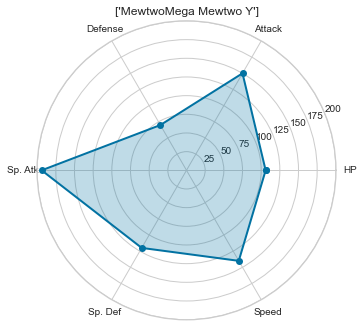

In [52]:
labels=np.array(['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed'])
stats=pokemon_df.loc[164,labels].values
angles=np.linspace(0, 2*np.pi, len(labels), endpoint=False)
# close the plot
stats=np.concatenate((stats,[stats[0]]))
angles=np.concatenate((angles,[angles[0]]))

fig=plt.show()
ax = plt.subplot(111, polar=True)
ax.plot(angles, stats, 'o-', linewidth=2)
ax.fill(angles, stats, alpha=0.25)
ax.set_thetagrids((angles * 180/np.pi)[0:6], labels)
ax.set_title([pokemon_df.loc[164,"Name"]])
ax.grid(True)


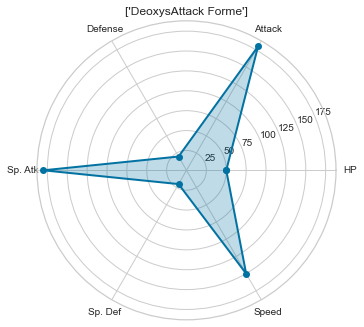

In [53]:
labels=np.array(['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed'])
stats=pokemon_df.loc[429,labels].values
angles=np.linspace(0, 2*np.pi, len(labels), endpoint=False)
# close the plot
stats=np.concatenate((stats,[stats[0]]))
angles=np.concatenate((angles,[angles[0]]))

fig=plt.show()
ax = plt.subplot(111, polar=True)
ax.plot(angles, stats, 'o-', linewidth=2)
ax.fill(angles, stats, alpha=0.25)
ax.set_thetagrids((angles * 180/np.pi)[0:6], labels)
ax.set_title([pokemon_df.loc[429,"Name"]])
ax.grid(True)


In [62]:
# Create dataset for neural network
X = fights_df.drop(['First_pokemon','Second_pokemon','Winner','Name_first','Total_first','Name_second','Total_second', 'first_win','Type 1_first','Type 2_first','Type 1_second','Type 2_second','Legendary_first','Legendary_second'], axis=1)
y = fights_df['first_win']
x = X.values  # Features

X_train, X_test, y_train, y_test = train_test_split(x , y, test_size=0.2)
X_train[0], y_train[0]

(array([ 56,  61,  65,  48,  45,  38, 115, 140, 130,  55,  55,  40],
       dtype=int64),
 False)

In [63]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from itertools import chain 

EPOCHS = 55
BATCH_SIZE = 16
LEARNING_RATE = 0.001

## train data
class trainData(Dataset):
    
    def __init__(self, X_data, y_data):
        self.X_data = X_data
        self.y_data = y_data
        
    def __getitem__(self, index):
        return self.X_data[index], self.y_data[index]
        
    def __len__ (self):
        return len(self.X_data)


train_data = trainData(torch.FloatTensor(X_train), 
                       torch.FloatTensor(y_train))
## test data    
class testData(Dataset):
    
    def __init__(self, X_data):
        self.X_data = X_data
        
    def __getitem__(self, index):
        return self.X_data[index]
        
    def __len__ (self):
        return len(self.X_data)
    

test_data = testData(torch.FloatTensor(X_test))

In [64]:
train_loader = DataLoader(dataset=train_data, batch_size=BATCH_SIZE, shuffle=True)
test_loader = DataLoader(dataset=test_data, batch_size=BATCH_SIZE)

In [65]:
class binaryClassification(nn.Module):
    def __init__(self):
        super(binaryClassification, self).__init__()
        # Number of input features is 12.
        self.layer_1 = nn.Linear(12, 100) 
        self.layer_2 = nn.Linear(100, 500)
        self.layer_3 = nn.Linear(500,100) 
        self.layer_4 = nn.Linear(100, 50) 
        self.layer_out = nn.Linear(50, 1) 

        self.out_act = nn.Sigmoid()
        
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(p=0.1)
        
    def forward(self, inputs):
        x = self.relu(self.layer_1(inputs))
        x = self.relu(self.layer_2(x))
        x = self.relu(self.layer_3(x))
        x = self.relu(self.layer_4(x))
        x = self.dropout(x)
        x = self.layer_out(x)
        x = self.out_act(x)
        
        return x

In [66]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


In [67]:
model = binaryClassification()
model.to(device)
print(model)
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=LEARNING_RATE)

binaryClassification(
  (layer_1): Linear(in_features=12, out_features=100, bias=True)
  (layer_2): Linear(in_features=100, out_features=500, bias=True)
  (layer_3): Linear(in_features=500, out_features=100, bias=True)
  (layer_4): Linear(in_features=100, out_features=50, bias=True)
  (layer_out): Linear(in_features=50, out_features=1, bias=True)
  (out_act): Sigmoid()
  (relu): ReLU()
  (dropout): Dropout(p=0.1, inplace=False)
)


In [68]:
def binary_acc(y_pred, y_test):
    y_pred_tag = torch.round(y_pred)
    
    correct_results_sum = (y_pred_tag == y_test).sum().float()
    acc = correct_results_sum/y_test.shape[0]
    acc = torch.round(acc * 100)
    
    return acc

In [69]:
model.train()
losslist = []
acclist = []
for e in range(0, EPOCHS):
    epoch_loss = 0
    epoch_acc = 0
    for X_batch, y_batch in train_loader:
        X_batch, y_batch = X_batch.to(device), y_batch.to(device)
        optimizer.zero_grad()
        y_pred = model(X_batch)

        loss = criterion(y_pred, y_batch.unsqueeze(1))
        acc = binary_acc(y_pred, y_batch.unsqueeze(1))
        
        loss.backward()
        optimizer.step()
    
        epoch_loss += loss.item()
        epoch_acc += acc.item()
        
    losslist.append(epoch_loss/len(train_loader))
    acclist.append(epoch_acc/len(train_loader))
    print(f'Epoch {e+0:03}: | Loss: {epoch_loss/len(train_loader):.5f} | Acc: {epoch_acc/len(train_loader):.3f}')

Epoch 000: | Loss: 0.27435 | Acc: 90.477
Epoch 001: | Loss: 0.22572 | Acc: 92.732
Epoch 002: | Loss: 0.21823 | Acc: 93.027
Epoch 003: | Loss: 0.20964 | Acc: 93.370
Epoch 004: | Loss: 0.20348 | Acc: 93.658
Epoch 005: | Loss: 0.19749 | Acc: 93.831
Epoch 006: | Loss: 0.19808 | Acc: 93.846
Epoch 007: | Loss: 0.19906 | Acc: 93.890
Epoch 008: | Loss: 0.19548 | Acc: 93.858
Epoch 009: | Loss: 0.19238 | Acc: 93.999
Epoch 010: | Loss: 0.18983 | Acc: 94.069
Epoch 011: | Loss: 0.18708 | Acc: 94.215
Epoch 012: | Loss: 0.18863 | Acc: 94.135
Epoch 013: | Loss: 0.18401 | Acc: 94.141
Epoch 014: | Loss: 0.18623 | Acc: 94.085
Epoch 015: | Loss: 0.18726 | Acc: 94.113
Epoch 016: | Loss: 0.18231 | Acc: 94.335
Epoch 017: | Loss: 0.18386 | Acc: 94.164
Epoch 018: | Loss: 0.18096 | Acc: 94.434
Epoch 019: | Loss: 0.17882 | Acc: 94.409
Epoch 020: | Loss: 0.17767 | Acc: 94.520
Epoch 021: | Loss: 0.18193 | Acc: 94.331
Epoch 022: | Loss: 0.17838 | Acc: 94.502
Epoch 023: | Loss: 0.17973 | Acc: 94.396
Epoch 024: | Los

In [70]:
from itertools import chain
y_pred_list = []
model.eval()
with torch.no_grad():
    for X_batch in test_loader:
        X_batch = X_batch.to(device)
        y_test_pred = model(X_batch)
        y_pred_tag = torch.round(y_test_pred)
        y_pred_list.append(y_pred_tag.cpu().numpy())

y_pred_list = [a.squeeze().tolist() for a in y_pred_list]
# flatten 2d list to 1d list
y_pred_list =  list(chain.from_iterable(y_pred_list))  
y_pred_list = np.array(y_pred_list)

In [71]:
acc = (y_test == y_pred_list)
test_acc = acc.sum()/len(acc)
print("Test Acc : ",test_acc)

Test Acc :  0.943


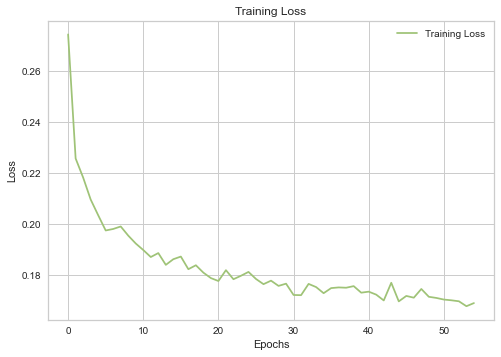

In [72]:
epochs=range(0,55)
plt.plot(epochs, losslist, 'g', label='Training Loss')
plt.title('Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

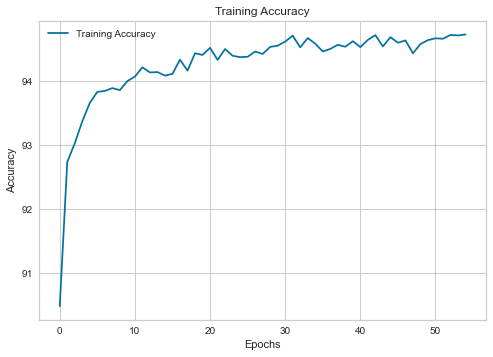

In [73]:
plt.plot(epochs, acclist, 'b', label='Training Accuracy')
plt.title('Training Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
# Group 53: 
# Group member: Margaux Tian, Shuangning Yang, Yuchen Yao, Qixin Wang, Chenyu Zhang